# Import Libraries

In [3]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from tqdm import tqdm
from keras import backend as K

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.models import load_model

C:\Users\NoteBook\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Import Data

In [7]:
# Define data path

PATH = os.getcwd()
data_path = PATH + '/train2'
data_dir_list = os.listdir(data_path)

In [8]:
img_data_list=[]
labels_list = []

labels_name={'cancer':0,'normal':1}

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loading the images of dataset-'+'{}\n'.format(dataset))
	label = labels_name[dataset]
	for img in tqdm(img_list):
		input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)
		labels_list.append(label)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loading the images of dataset-cancer



100%|██████████████████████████████████████████████████████████████████████████████| 1900/1900 [00:28<00:00, 67.56it/s]


Loading the images of dataset-normal



100%|██████████████████████████████████████████████████████████████████████████████| 1598/1598 [00:22<00:00, 72.43it/s]


(3498, 128, 128, 3)


# pre-processing Data

In [9]:
### convert labels to one hot encoding

labels = np.array(labels_list)
# print the count of number of samples for different classes
print(np.unique(labels,return_counts=True))
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, 2)

(array([0, 1]), array([1900, 1598], dtype=int64))


In [10]:

x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# Build Model

In [11]:
input_shape=img_data[0].shape

model = Sequential()

model.add(Conv2D(16, (5,5),strides=(1,1), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(32, (5,5),strides=(1,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2,2)))

model.add(Conv2D(64, (5,5),strides=(1,1)))
model.add(Activation('relu'))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(2))

model.add(Activation('sigmoid'))


# Train Model 

In [12]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=["accuracy",'mse', 'mae', 'mape', 'cosine'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 16)      1216      
_________________________________________________________________
activation_1 (Activation)    (None, 124, 124, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 32)        12832     
_________________________________________________________________
activation_2 (Activation)    (None, 58, 58, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)        51264     
__________

In [14]:
hist = model.fit(X_train, y_train, batch_size=64, epochs=10, verbose=1, validation_split=0.2)

Train on 2238 samples, validate on 560 samples
Epoch 1/10
2238/2238 [==============================] - ETA: 1:56 - loss: 0.2328 - acc: 0.9062 - mean_squared_error: 0.0688 - mean_absolute_error: 0.1489 - mean_absolute_percentage_error: 77422640.0000 - cosine_proximity: -0.92 - ETA: 1:54 - loss: 0.1702 - acc: 0.9453 - mean_squared_error: 0.0445 - mean_absolute_error: 0.1216 - mean_absolute_percentage_error: 62270436.0000 - cosine_proximity: -0.95 - ETA: 1:45 - loss: 0.1586 - acc: 0.9583 - mean_squared_error: 0.0403 - mean_absolute_error: 0.1170 - mean_absolute_percentage_error: 59155710.6667 - cosine_proximity: -0.95 - ETA: 1:36 - loss: 0.1549 - acc: 0.9570 - mean_squared_error: 0.0400 - mean_absolute_error: 0.1118 - mean_absolute_percentage_error: 56257901.0000 - cosine_proximity: -0.95 - ETA: 1:30 - loss: 0.1406 - acc: 0.9625 - mean_squared_error: 0.0355 - mean_absolute_error: 0.1026 - mean_absolute_percentage_error: 51565844.8000 - cosine_proximity: -0.96 - ETA: 1:27 - loss: 0.1419 - 

2238/2238 [==============================] - ETA: 1:49 - loss: 0.1092 - acc: 0.9766 - mean_squared_error: 0.0198 - mean_absolute_error: 0.0962 - mean_absolute_percentage_error: 49204736.0000 - cosine_proximity: -0.98 - ETA: 1:42 - loss: 0.1488 - acc: 0.9570 - mean_squared_error: 0.0339 - mean_absolute_error: 0.1076 - mean_absolute_percentage_error: 54576056.0000 - cosine_proximity: -0.96 - ETA: 1:38 - loss: 0.1319 - acc: 0.9661 - mean_squared_error: 0.0299 - mean_absolute_error: 0.0958 - mean_absolute_percentage_error: 47751765.3333 - cosine_proximity: -0.97 - ETA: 1:35 - loss: 0.1482 - acc: 0.9551 - mean_squared_error: 0.0374 - mean_absolute_error: 0.1011 - mean_absolute_percentage_error: 49378152.0000 - cosine_proximity: -0.96 - ETA: 1:31 - loss: 0.1554 - acc: 0.9484 - mean_squared_error: 0.0416 - mean_absolute_error: 0.1054 - mean_absolute_percentage_error: 50700846.4000 - cosine_proximity: -0.95 - ETA: 1:28 - loss: 0.1580 - acc: 0.9453 - mean_squared_error: 0.0427 - mean_absolute_e

2238/2238 [==============================] - ETA: 1:30 - loss: 0.1449 - acc: 0.9531 - mean_squared_error: 0.0390 - mean_absolute_error: 0.0906 - mean_absolute_percentage_error: 51478952.0000 - cosine_proximity: -0.95 - ETA: 1:25 - loss: 0.1323 - acc: 0.9609 - mean_squared_error: 0.0351 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 50818752.0000 - cosine_proximity: -0.96 - ETA: 1:22 - loss: 0.1419 - acc: 0.9531 - mean_squared_error: 0.0389 - mean_absolute_error: 0.0977 - mean_absolute_percentage_error: 51660053.3333 - cosine_proximity: -0.95 - ETA: 1:19 - loss: 0.1304 - acc: 0.9531 - mean_squared_error: 0.0364 - mean_absolute_error: 0.0897 - mean_absolute_percentage_error: 46517808.5000 - cosine_proximity: -0.96 - ETA: 1:19 - loss: 0.1243 - acc: 0.9531 - mean_squared_error: 0.0351 - mean_absolute_error: 0.0864 - mean_absolute_percentage_error: 43972144.4000 - cosine_proximity: -0.96 - ETA: 1:18 - loss: 0.1154 - acc: 0.9583 - mean_squared_error: 0.0321 - mean_absolute_e

2238/2238 [==============================] - ETA: 1:31 - loss: 0.1398 - acc: 0.9531 - mean_squared_error: 0.0380 - mean_absolute_error: 0.0813 - mean_absolute_percentage_error: 41117492.0000 - cosine_proximity: -0.96 - ETA: 1:25 - loss: 0.1867 - acc: 0.9297 - mean_squared_error: 0.0549 - mean_absolute_error: 0.0976 - mean_absolute_percentage_error: 48650896.0000 - cosine_proximity: -0.94 - ETA: 1:22 - loss: 0.1722 - acc: 0.9323 - mean_squared_error: 0.0523 - mean_absolute_error: 0.0929 - mean_absolute_percentage_error: 46472033.3333 - cosine_proximity: -0.94 - ETA: 1:21 - loss: 0.1578 - acc: 0.9375 - mean_squared_error: 0.0470 - mean_absolute_error: 0.0885 - mean_absolute_percentage_error: 44553755.0000 - cosine_proximity: -0.94 - ETA: 1:18 - loss: 0.1453 - acc: 0.9437 - mean_squared_error: 0.0423 - mean_absolute_error: 0.0841 - mean_absolute_percentage_error: 42378354.4000 - cosine_proximity: -0.95 - ETA: 1:16 - loss: 0.1457 - acc: 0.9440 - mean_squared_error: 0.0410 - mean_absolute_e

2238/2238 [==============================] - ETA: 1:25 - loss: 0.0676 - acc: 0.9922 - mean_squared_error: 0.0138 - mean_absolute_error: 0.0584 - mean_absolute_percentage_error: 28237364.0000 - cosine_proximity: -0.98 - ETA: 1:24 - loss: 0.0567 - acc: 0.9961 - mean_squared_error: 0.0103 - mean_absolute_error: 0.0500 - mean_absolute_percentage_error: 25288484.0000 - cosine_proximity: -0.99 - ETA: 1:23 - loss: 0.0662 - acc: 0.9922 - mean_squared_error: 0.0139 - mean_absolute_error: 0.0553 - mean_absolute_percentage_error: 29321282.6667 - cosine_proximity: -0.98 - ETA: 1:19 - loss: 0.0739 - acc: 0.9883 - mean_squared_error: 0.0161 - mean_absolute_error: 0.0554 - mean_absolute_percentage_error: 29657855.0000 - cosine_proximity: -0.98 - ETA: 1:17 - loss: 0.0753 - acc: 0.9844 - mean_squared_error: 0.0169 - mean_absolute_error: 0.0569 - mean_absolute_percentage_error: 30836197.6000 - cosine_proximity: -0.98 - ETA: 1:14 - loss: 0.0811 - acc: 0.9831 - mean_squared_error: 0.0182 - mean_absolute_e

2238/2238 [==============================] - ETA: 1:36 - loss: 0.0875 - acc: 0.9609 - mean_squared_error: 0.0253 - mean_absolute_error: 0.0570 - mean_absolute_percentage_error: 29057292.0000 - cosine_proximity: -0.97 - ETA: 1:34 - loss: 0.0819 - acc: 0.9570 - mean_squared_error: 0.0250 - mean_absolute_error: 0.0519 - mean_absolute_percentage_error: 26211487.0000 - cosine_proximity: -0.97 - ETA: 1:28 - loss: 0.0751 - acc: 0.9661 - mean_squared_error: 0.0216 - mean_absolute_error: 0.0512 - mean_absolute_percentage_error: 26024286.6667 - cosine_proximity: -0.97 - ETA: 1:23 - loss: 0.0705 - acc: 0.9707 - mean_squared_error: 0.0189 - mean_absolute_error: 0.0506 - mean_absolute_percentage_error: 25319899.0000 - cosine_proximity: -0.97 - ETA: 1:19 - loss: 0.0696 - acc: 0.9750 - mean_squared_error: 0.0176 - mean_absolute_error: 0.0520 - mean_absolute_percentage_error: 26042544.4000 - cosine_proximity: -0.98 - ETA: 1:16 - loss: 0.0638 - acc: 0.9779 - mean_squared_error: 0.0156 - mean_absolute_e

2238/2238 [==============================] - ETA: 1:41 - loss: 0.0430 - acc: 0.9688 - mean_squared_error: 0.0122 - mean_absolute_error: 0.0319 - mean_absolute_percentage_error: 15650714.0000 - cosine_proximity: -0.98 - ETA: 1:39 - loss: 0.0630 - acc: 0.9609 - mean_squared_error: 0.0188 - mean_absolute_error: 0.0435 - mean_absolute_percentage_error: 21336259.0000 - cosine_proximity: -0.97 - ETA: 1:35 - loss: 0.0740 - acc: 0.9661 - mean_squared_error: 0.0208 - mean_absolute_error: 0.0544 - mean_absolute_percentage_error: 27330512.6667 - cosine_proximity: -0.97 - ETA: 1:31 - loss: 0.0893 - acc: 0.9629 - mean_squared_error: 0.0256 - mean_absolute_error: 0.0647 - mean_absolute_percentage_error: 32318106.5000 - cosine_proximity: -0.97 - ETA: 1:25 - loss: 0.0938 - acc: 0.9641 - mean_squared_error: 0.0263 - mean_absolute_error: 0.0628 - mean_absolute_percentage_error: 31675806.8000 - cosine_proximity: -0.97 - ETA: 1:21 - loss: 0.1037 - acc: 0.9609 - mean_squared_error: 0.0285 - mean_absolute_e

2238/2238 [==============================] - ETA: 1:29 - loss: 0.0425 - acc: 0.9844 - mean_squared_error: 0.0117 - mean_absolute_error: 0.0335 - mean_absolute_percentage_error: 19118540.0000 - cosine_proximity: -0.98 - ETA: 1:33 - loss: 0.0774 - acc: 0.9766 - mean_squared_error: 0.0193 - mean_absolute_error: 0.0424 - mean_absolute_percentage_error: 22421785.0000 - cosine_proximity: -0.98 - ETA: 1:32 - loss: 0.0620 - acc: 0.9818 - mean_squared_error: 0.0147 - mean_absolute_error: 0.0373 - mean_absolute_percentage_error: 20516901.3333 - cosine_proximity: -0.98 - ETA: 1:30 - loss: 0.0727 - acc: 0.9785 - mean_squared_error: 0.0185 - mean_absolute_error: 0.0403 - mean_absolute_percentage_error: 21874896.0000 - cosine_proximity: -0.98 - ETA: 1:28 - loss: 0.0626 - acc: 0.9828 - mean_squared_error: 0.0153 - mean_absolute_error: 0.0364 - mean_absolute_percentage_error: 19922161.0000 - cosine_proximity: -0.98 - ETA: 1:25 - loss: 0.0784 - acc: 0.9753 - mean_squared_error: 0.0212 - mean_absolute_e

2238/2238 [==============================] - ETA: 1:26 - loss: 0.1449 - acc: 0.9375 - mean_squared_error: 0.0436 - mean_absolute_error: 0.0822 - mean_absolute_percentage_error: 43466448.0000 - cosine_proximity: -0.95 - ETA: 1:31 - loss: 0.0991 - acc: 0.9609 - mean_squared_error: 0.0278 - mean_absolute_error: 0.0630 - mean_absolute_percentage_error: 33239888.0000 - cosine_proximity: -0.96 - ETA: 1:41 - loss: 0.0853 - acc: 0.9714 - mean_squared_error: 0.0235 - mean_absolute_error: 0.0568 - mean_absolute_percentage_error: 30686970.6667 - cosine_proximity: -0.97 - ETA: 1:34 - loss: 0.0903 - acc: 0.9668 - mean_squared_error: 0.0250 - mean_absolute_error: 0.0575 - mean_absolute_percentage_error: 30338850.0000 - cosine_proximity: -0.97 - ETA: 1:32 - loss: 0.0978 - acc: 0.9594 - mean_squared_error: 0.0284 - mean_absolute_error: 0.0627 - mean_absolute_percentage_error: 31321932.0000 - cosine_proximity: -0.97 - ETA: 1:30 - loss: 0.0917 - acc: 0.9635 - mean_squared_error: 0.0258 - mean_absolute_e

2238/2238 [==============================] - ETA: 1:33 - loss: 0.2589 - acc: 0.9219 - mean_squared_error: 0.0739 - mean_absolute_error: 0.1064 - mean_absolute_percentage_error: 47957820.0000 - cosine_proximity: -0.92 - ETA: 1:28 - loss: 0.1531 - acc: 0.9492 - mean_squared_error: 0.0433 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 30748074.5000 - cosine_proximity: -0.95 - ETA: 1:24 - loss: 0.1341 - acc: 0.9583 - mean_squared_error: 0.0371 - mean_absolute_error: 0.0671 - mean_absolute_percentage_error: 28985165.6667 - cosine_proximity: -0.96 - ETA: 1:21 - loss: 0.1231 - acc: 0.9570 - mean_squared_error: 0.0344 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 29265249.7500 - cosine_proximity: -0.96 - ETA: 1:18 - loss: 0.1103 - acc: 0.9656 - mean_squared_error: 0.0295 - mean_absolute_error: 0.0636 - mean_absolute_percentage_error: 28453979.0000 - cosine_proximity: -0.97 - ETA: 1:15 - loss: 0.1042 - acc: 0.9688 - mean_squared_error: 0.0278 - mean_absolute_e

# Plot : accuracy & validation
# Model Evaluation 

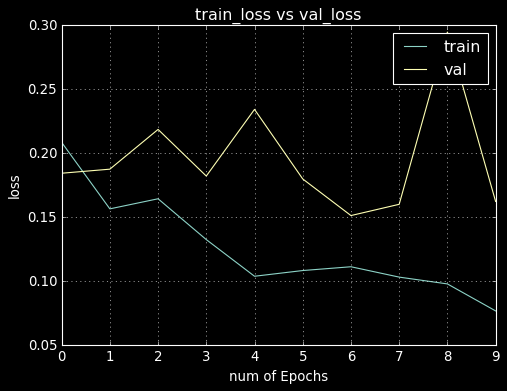

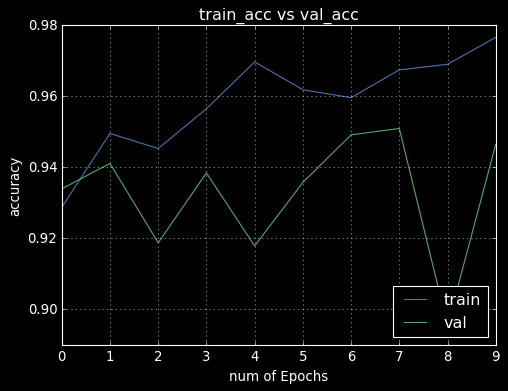

In [45]:
epochs=10

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(epochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['seaborn-deep'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['dark_background'])


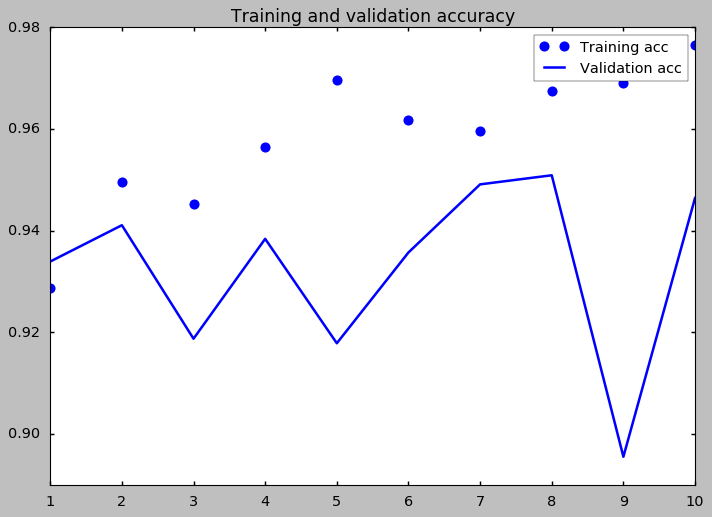

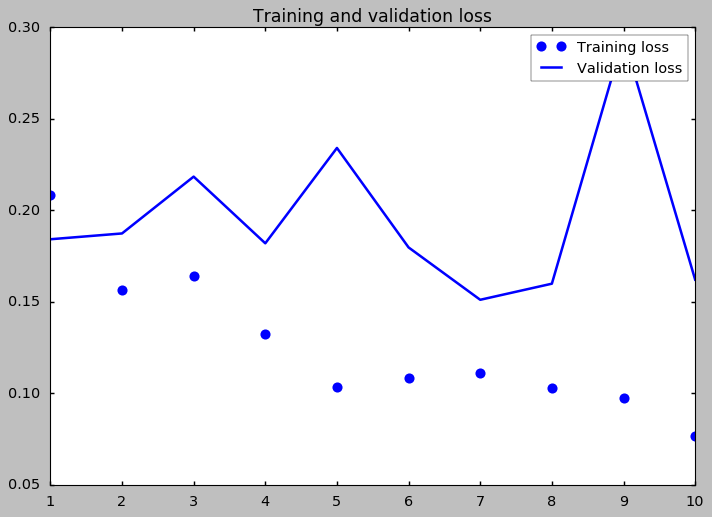

In [16]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [19]:
score = model.evaluate(X_train, y_train,  verbose=0)

print('Train Loss:', score[0])
print('Train accuracy:', score[1])

Train Loss: 0.07387513399997551
Train accuracy: 0.9792709076634639


In [20]:
score = model.evaluate(X_test, y_test,  verbose=0)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])

Test Loss: 0.18538851848670415
Test accuracy: 0.9542857149669103


# Prediction 

In [21]:
test_image = X_test[0:1]
print (test_image.shape)

print(model.predict(test_image))
print(model.predict_classes(test_image))

print(y_test[0:1])

(1, 128, 128, 3)
[[0.00802013 0.99262446]]
[1]
[[0. 1.]]


In [41]:
# Testing a new image

test_image = cv2.imread(r'C:\Users\NoteBook\Desktop\OurData\classes\009.jpg')

test_image = cv2.resize(test_image,(128,128))
test_image = np.array(test_image).reshape(-1,128, 128,3)

test_image = test_image.astype('float32')
test_image /= 255
print (test_image.shape)

print((model.predict(test_image)))
print(model.predict_classes(test_image))

(1, 128, 128, 3)
[[0.99 0.01]]
[0]


# Plot featuremaps

In [ ]:
def get_featuremaps(model, layer_idx, X_batch):
	get_activations = K.function([model.layers[0].input, K.learning_phase()],[model.layers[layer_idx].output,])
	activations = get_activations([X_batch,0])
	return activations

layer_num=3
filter_num=0

activations = get_featuremaps(model, int(layer_num),test_image)

print (np.shape(activations))
feature_maps = activations[0][0]      
print (np.shape(feature_maps))

if K.image_dim_ordering()=='th':
	feature_maps=np.rollaxis((np.rollaxis(feature_maps,2,0)),2,0)
print (feature_maps.shape)

fig=plt.figure(figsize=(16,16))
plt.imshow(feature_maps[:,:,filter_num])
plt.savefig("featuremaps-layer-{}".format(layer_num) + "-filternum-{}".format(filter_num)+'.jpg')

num_of_featuremaps=feature_maps.shape[2]
fig=plt.figure(figsize=(16,16))	
plt.title("featuremaps-layer-{}".format(layer_num))
subplot_num=int(np.ceil(np.sqrt(num_of_featuremaps)))
for i in range(int(num_of_featuremaps)):
	ax = fig.add_subplot(subplot_num, subplot_num, i+1)
	#ax.imshow(output_image[0,:,:,i],interpolation='nearest' ) #to see the first filter
	ax.imshow(feature_maps[:,:,i])
	plt.xticks([])
	plt.yticks([])
	plt.tight_layout()
plt.show()
fig.savefig("featuremaps-layer-{}".format(layer_num) + '.jpg')

# Plot confusion_matrix

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(X_test)
print(Y_pred)

y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)

# y_pred = model.predict_classes(X_test)
# print('is : ',y_pred)

target_names = ['class 0(cancer)', 'class 1(normal)']
					

print(classification_report(np.argmax(y_test,axis=1), y_pred,target_names=target_names))



[[8.0201346e-03 9.9262446e-01]
 [5.2876920e-02 9.4646442e-01]
 [1.7120107e-04 9.9956304e-01]
 ...
 [1.0000000e+00 8.1151853e-18]
 [9.9718374e-01 1.3436650e-01]
 [9.9999893e-01 6.9068636e-07]]
[1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 1 0 0 1 1 1 0 1 0 1 1 1
 0 1 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0
 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0
 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 1 0
 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 0
 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 0 0 1 0 1 0 1 1
 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 1
 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0
 0 1 1 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 0 1 1 0 0 1

In [24]:
classes = 2
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[353  20]
 [ 10 317]]


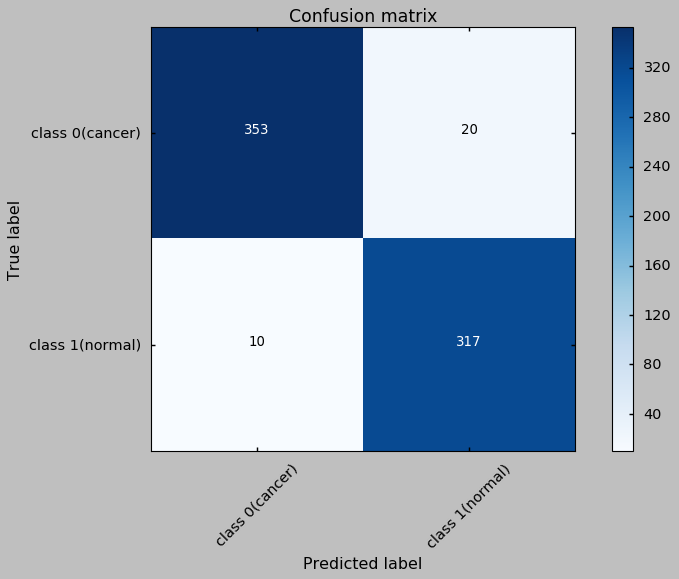

In [25]:
cnf_matrix = (confusion_matrix(np.argmax(y_test,axis=1), y_pred))

np.set_printoptions(precision=2)

plt.figure()

# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')
#plt.figure()
# Plot normalized confusion matrix
#plot_confusion_matrix(cnf_matrix, classes=target_names, normalize=True,
#                      title='Normalized confusion matrix')
#plt.figure()
plt.show()

# Callbacks

In [ ]:
from keras import callbacks

filename='model_train_new.csv'
csv_log=callbacks.CSVLogger(filename, separator=',', append=False)

early_stopping=callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='min')

filepath="Best-weights-my_model-{epoch:03d}-{loss:.4f}-{acc:.4f}.hdf5"

checkpoint = callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min')

callbacks_list = [csv_log,early_stopping,checkpoint]

hist = model.fit(X_train, y_train, batch_size=1, epochs=3, verbose=1, validation_data=(X_test, y_test),callbacks=callbacks_list)


# Plot Metrics

In [ ]:
# 1 

model.compile(loss='mse', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
history = model.fit(X_train, y_train, epochs=5, batch_size=2, verbose=2)

#plot metrics 1
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['mean_absolute_percentage_error'])
plt.plot(history.history['cosine_proximity'])
plt.show()

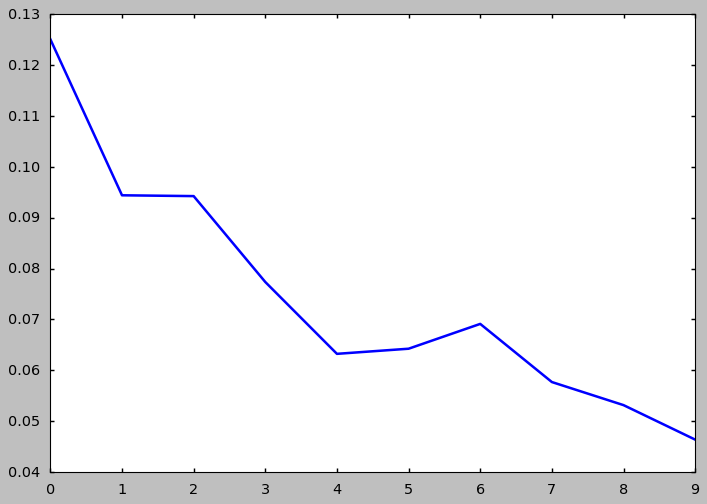

In [27]:
plt.plot(hist.history['mean_absolute_error'])


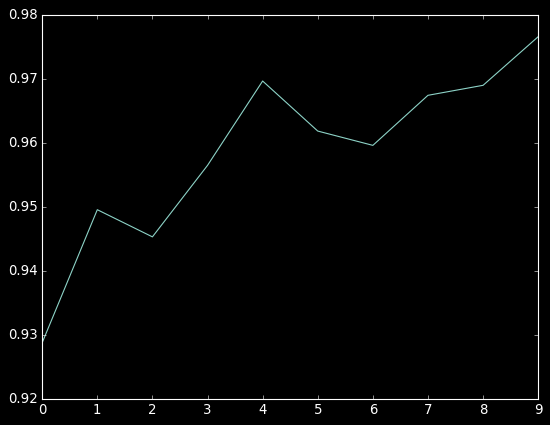

In [46]:


plt.plot(hist.history['acc'])
plt.show()


# More Plots  (don't touch please)

In [ ]:
from collections import iterable

from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(history)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()      

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets


visualizer = ResidualsPlot(history)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature

precision, recall, _ = precision_recall_curve(y_test, y_score)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision))

# Save Model

In [29]:
saved_model = model.save('model.h5')


In [28]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


# Load Model   (don't touch please)

In [ ]:
loaded_model= load_model(saved_model)

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")